<a href="https://colab.research.google.com/github/linalex13666/Labs/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install scikit-fuzzy
import numpy as np


In [32]:
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [43]:
defect = ctrl.Antecedent( np.arange(0, 151, 1), "Уровень дефектов" )
speed = ctrl.Antecedent( np.arange(0, 121, 1), "Скорость производства" )
adjustment = ctrl.Consequent( np.arange(0, 151, 1), "Корректировка процесса" )

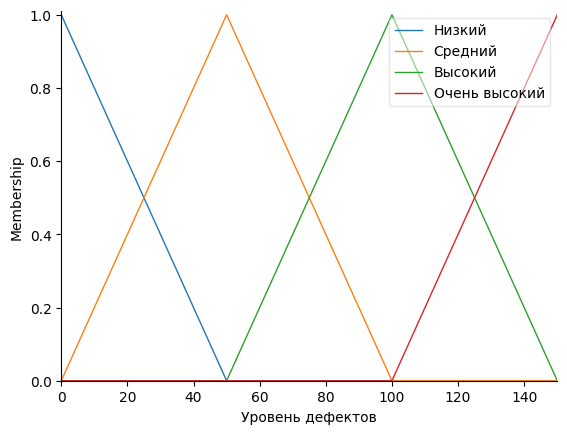

In [50]:
defect['Низкий'] = fuz.trimf(defect.universe, [0, 0, 50])
defect['Средний'] = fuz.trimf(defect.universe, [0, 50, 100])
defect['Высокий'] = fuz.trimf(defect.universe, [50, 100, 150])
defect['Очень высокий'] = fuz.trimf(defect.universe, [100, 150, 150])
defect.view()


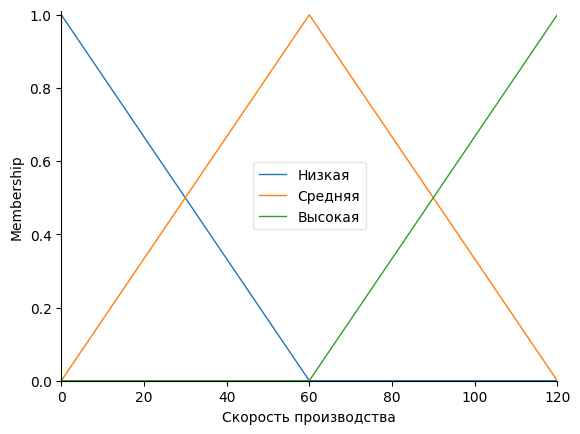

In [52]:
speed["Низкая"] = fuz.trimf( speed.universe, [0, 0, 60] )
speed["Средняя"] = fuz.trimf( speed.universe, [0, 60, 120] )
speed["Высокая"] = fuz.trimf( speed.universe, [60, 120, 120] )
speed.view()


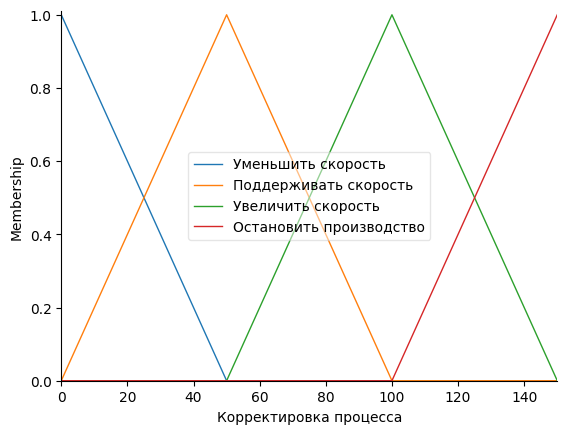

In [53]:
adjustment['Уменьшить скорость'] = fuz.trimf(adjustment.universe, [0, 0, 50])
adjustment['Поддерживать скорость'] = fuz.trimf(adjustment.universe, [0, 50, 100])
adjustment['Увеличить скорость'] = fuz.trimf(adjustment.universe, [50, 100, 150])
adjustment['Остановить производство'] = fuz.trimf(adjustment.universe, [100, 150, 150])
adjustment.view()

In [73]:
rule1 = ctrl.Rule(defect["Очень высокий"] & speed["Высокая"], adjustment["Остановить производство"])
rule2 = ctrl.Rule(defect["Высокий"] & speed["Высокая"], adjustment["Уменьшить скорость"])
rule3 = ctrl.Rule(defect["Низкий"] & speed["Низкая"], adjustment["Увеличить скорость"])
rule4 = ctrl.Rule(defect["Низкий"] & speed["Высокая"], adjustment["Поддерживать скорость"])

In [55]:
process_adjustment_ctrl = ctrl.ControlSystem( [rule1, rule2, rule3, rule4] )
process_adjustment = ctrl.ControlSystemSimulation( process_adjustment_ctrl )

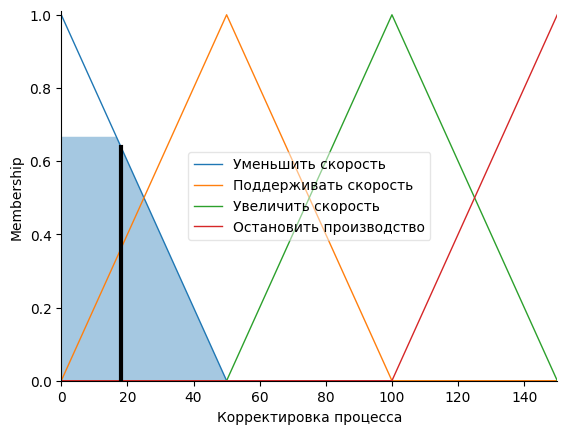

In [59]:
process_adjustment.input["Уровень дефектов"] = 100
process_adjustment.input["Скорость производства"] = 100
process_adjustment.compute()

adjustment.view( sim = process_adjustment)


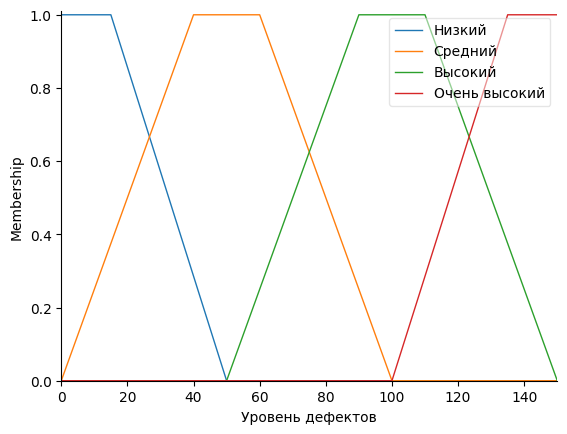

In [65]:
defect['Низкий'] = fuz.trapmf(defect.universe, [0, 0, 15, 50])
defect['Средний'] = fuz.trapmf(defect.universe, [0, 40, 60, 100])
defect['Высокий'] = fuz.trapmf(defect.universe, [50, 90, 110, 150])
defect['Очень высокий'] = fuz.trapmf(defect.universe, [100, 135, 150, 150])
defect.view()

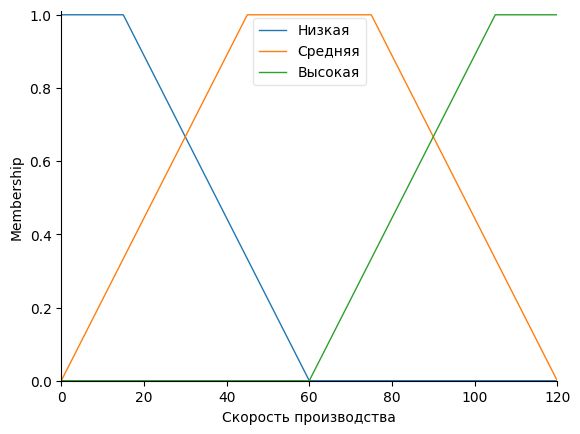

In [68]:
speed["Низкая"] = fuz.trapmf( speed.universe, [0, 0, 15, 60] )
speed["Средняя"] = fuz.trapmf( speed.universe, [0, 45, 75, 120] )
speed["Высокая"] = fuz.trapmf( speed.universe, [60, 105, 120, 120] )
speed.view()

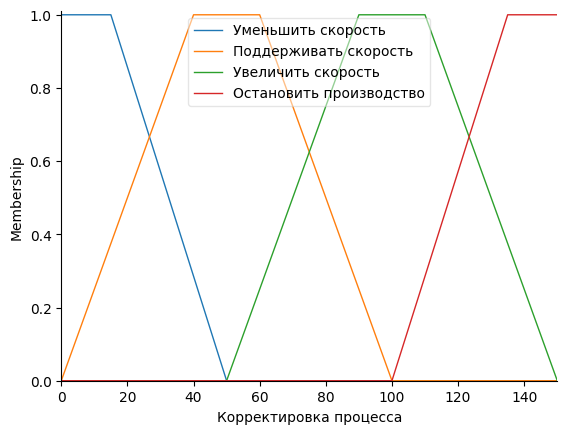

In [70]:
adjustment['Уменьшить скорость'] = fuz.trapmf(adjustment.universe, [0, 0, 15, 50])
adjustment['Поддерживать скорость'] = fuz.trapmf(adjustment.universe, [0, 40, 60, 100])
adjustment['Увеличить скорость'] = fuz.trapmf(adjustment.universe, [50, 90, 110, 150])
adjustment['Остановить производство'] = fuz.trapmf(adjustment.universe, [100, 135, 150, 150])
adjustment.view()

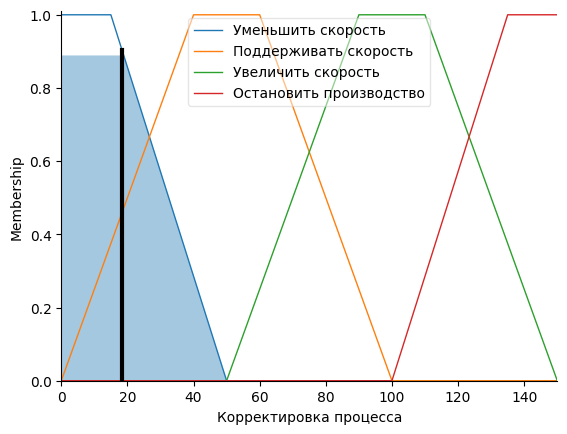

In [74]:
process_adjustment_ctrl = ctrl.ControlSystem( [rule1, rule2, rule3, rule4] )
process_adjustment = ctrl.ControlSystemSimulation( process_adjustment_ctrl )
process_adjustment.input["Уровень дефектов"] = 100
process_adjustment.input["Скорость производства"] = 100
process_adjustment.compute()

adjustment.view( sim = process_adjustment)